# Part 2: Regression Problem 

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelBinarizer

C:\Users\ADITI\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Read excel file.
housingData=pd.read_excel('ca_housing.xlsx')

In [3]:
housingData.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [4]:
housingData.shape

(20640, 10)

In [5]:
housingData.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


### checking for categorical and numeric value count

In [6]:
numCount = housingData.dtypes[housingData.dtypes != "object"].index
print("Numerical data count: ", len(numCount))

catCount = housingData.dtypes[housingData.dtypes == "object"].index
print("Categorical data count: ", len(catCount))

Numerical data count:  9
Categorical data count:  1


In [7]:
# We only 1 categorical feature in our dataset.
housingData['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

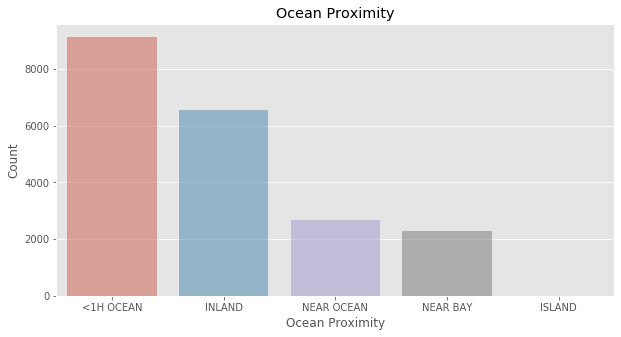

In [8]:
type_count = housingData['ocean_proximity'].value_counts()
plt.figure(figsize=(10,5))
plt.style.use('ggplot')
sns.barplot(type_count.index, type_count.values, alpha=0.5)
plt.title('Ocean Proximity')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Ocean Proximity', fontsize=12)
plt.show()

In [9]:
# converting variable to numeric values by mapping individual values.
dictionary={'ISLAND':0,'NEAR BAY':1, 'NEAR OCEAN': 2, 'INLAND': 3, '<1H OCEAN': 4}
housingData["ocean_proximity"]=housingData["ocean_proximity"].map(dictionary)
print(housingData["ocean_proximity"].unique())

[1 4 3 2 0]


In [10]:
housingData.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,1
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,1
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,1
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,1
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,1


### Check for Missing Values:

In [11]:
nullValues=housingData.isnull().sum()
nullValues

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [12]:
# impute null values in total_bedrooms column by median
med = housingData['total_bedrooms'].median()
housingData['total_bedrooms'].fillna(med, inplace=True)

In [13]:
nullValues=housingData.isnull().sum()
nullValues

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014A1C77BA58>,
      dtype=object)

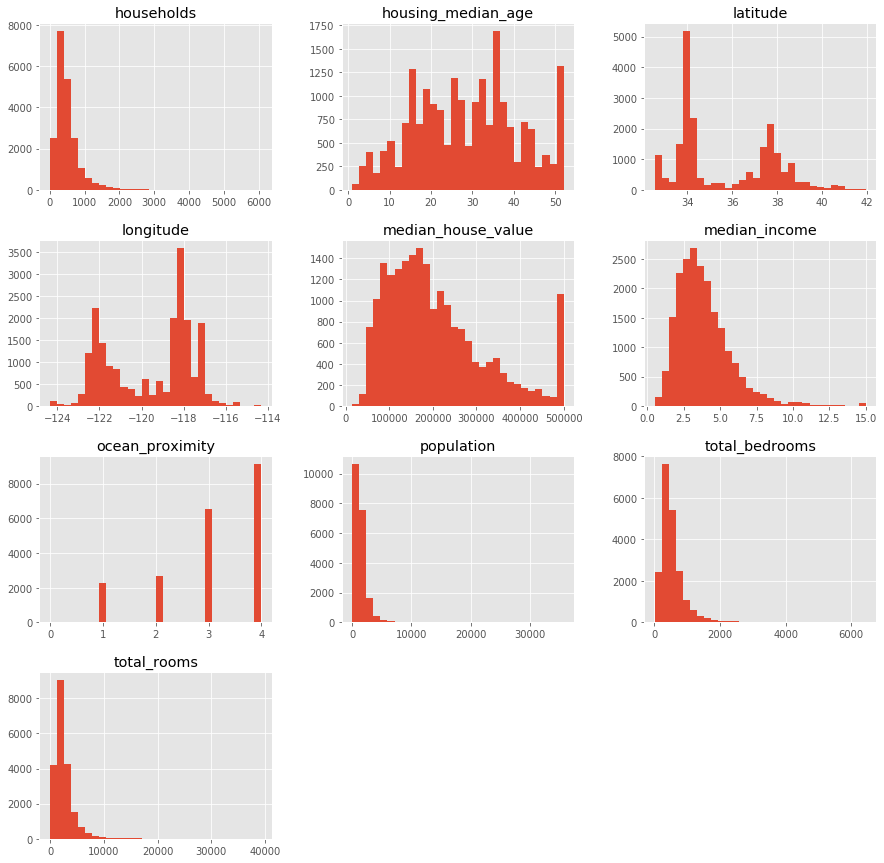

In [14]:
housingData.hist(bins=30, figsize=(15, 15))

### Feature Engineeering

In [15]:
housingData['rooms_per_house'] = housingData['total_rooms']/housingData['households']
housingData['bedrooms_per_room'] = housingData['total_bedrooms']/housingData['total_rooms']
housingData['population_per_house'] = housingData['population']/housingData['households']

### Checking correlation between dependent and independent features.

In [16]:
corrMat= housingData.corr()
corrMat['median_house_value'].sort_values(ascending=False)

median_house_value      1.000000
median_income           0.688075
rooms_per_house         0.151948
total_rooms             0.134153
housing_median_age      0.105623
households              0.065843
total_bedrooms          0.049457
ocean_proximity        -0.021732
population_per_house   -0.023737
population             -0.024650
longitude              -0.045967
latitude               -0.144160
bedrooms_per_room      -0.233303
Name: median_house_value, dtype: float64

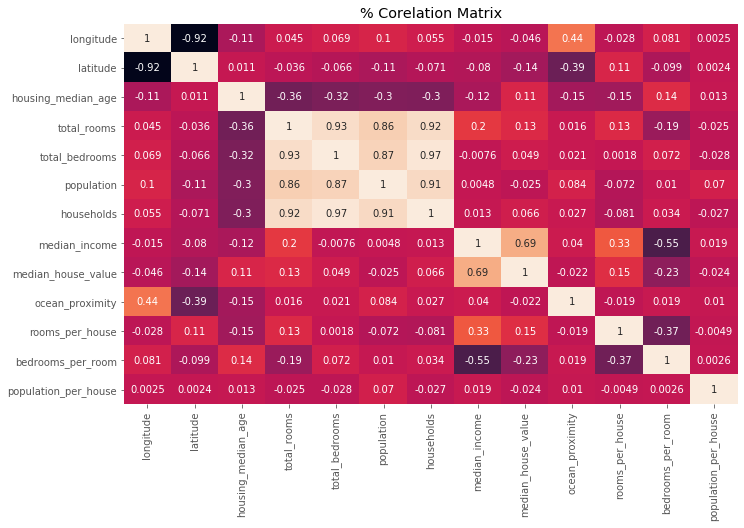

In [17]:
plt.figure(figsize=(11,7))
sns.heatmap(cbar=False,annot=True,data=housingData.corr())
plt.title('% Corelation Matrix')
plt.show()

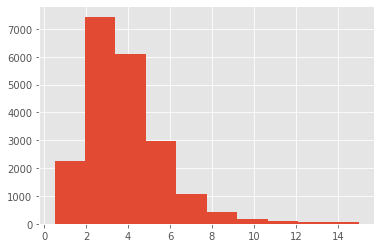

In [18]:
#'median_income' is highly correlated with target variable
housingData['median_income'].hist()


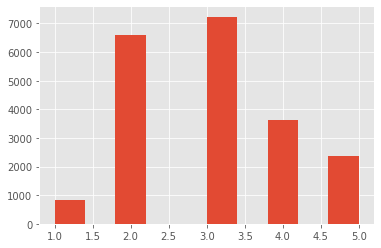

In [19]:
housingData['income_cat'] = np.ceil(housingData['median_income']/1.5)
housingData['income_cat'].where(housingData['income_cat']<5, 5.0, inplace=True)
housingData['income_cat'].hist()

### Scale all the variables

In [20]:
numCount = housingData.dtypes[housingData.dtypes != "object"].index
print("Numerical data count: ", len(numCount))


Numerical data count:  14


C:\Users\ADITI\Anaconda3\lib\site-packages\seaborn\categorical.py:486: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  **kws)


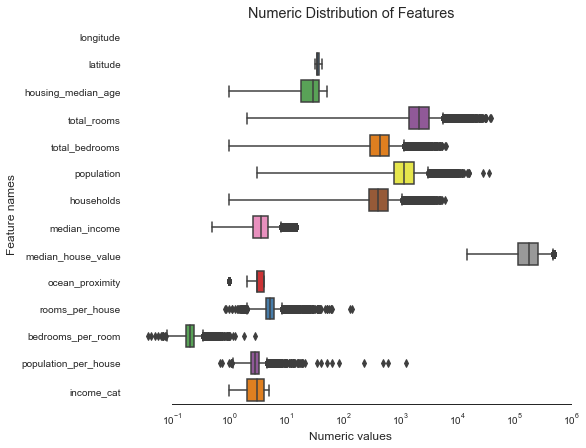

In [21]:
# Let's make sure we handled all the skewed values
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=housingData[numCount] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

In [22]:
from sklearn.preprocessing import RobustScaler
scaled_features = housingData.copy()
col_names = list(numCount)
features = scaled_features[col_names]

rs = RobustScaler()

features = rs.fit_transform(features.values)

scaled_features[col_names] = features
# housingData = scaled_features
# housingData.head()


C:\Users\ADITI\Anaconda3\lib\site-packages\seaborn\categorical.py:486: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  **kws)


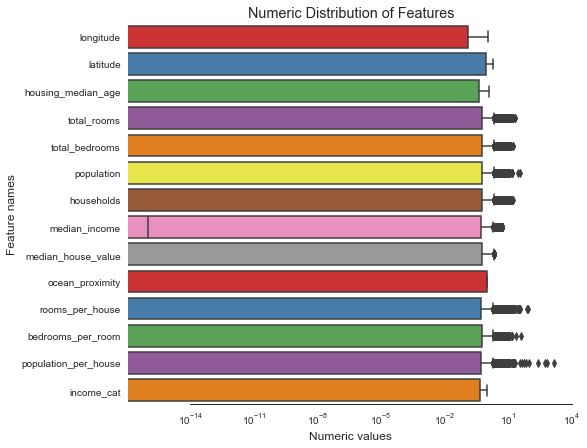

In [23]:
# Let's make sure we handled all the skewed values
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=scaled_features[numCount] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

In [24]:
housingData = scaled_features
housingData.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house,bedrooms_per_room,population_per_house,income_cat
0,-0.986807,0.957672,0.631579,-0.733422,-0.883755,-0.899787,-0.870769,2.197582,1.880448,-2.0,1.088935,-0.871600,-0.307981,1.0
1,-0.984169,0.952381,-0.421053,2.924276,1.937906,1.316631,2.243077,2.186664,1.232041,-2.0,0.626066,-0.729759,-0.830800,1.0
2,-0.989446,0.949735,1.210526,-0.388178,-0.707581,-0.714286,-0.713846,1.707732,1.187941,-2.0,1.898042,-1.134689,-0.018599,1.0
3,-0.992084,0.949735,1.210526,-0.501691,-0.577617,-0.648188,-0.584615,0.967177,1.113523,-2.0,0.364978,-0.288140,-0.316908,0.5
4,-0.992084,0.949735,1.210526,-0.294074,-0.447653,-0.640725,-0.461538,0.142854,1.119724,-2.0,0.653191,-0.478621,-0.746784,0.0


### Splitting the data into training and testing

In [26]:
X = housingData.loc[:, housingData.columns != 'median_house_value']
y = housingData['median_house_value']


In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

## Linear Regression

In [28]:
linearRegModel = LinearRegression()
linearRegModel.fit(X_train,y_train)
y_pred = linearRegModel.predict(X_test)


In [29]:
train_Acc = linearRegModel.score(X_train, y_train)
test_Acc = linearRegModel.score(X_test, y_test)

mse = metrics.mean_squared_error(y_test,y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))

results = pd.DataFrame([['Linear Regression', train_Acc, test_Acc, mse, rmse]],
               columns = ['Model', 'Train Accuracy(R2)','Test Accuracy(R2)', 'Mean Square Error','Root Mean Square Error' ])

results

,Model,Train Accuracy(R2),Test Accuracy(R2),Mean Square Error,Root Mean Square Error
0,Linear Regression,0.65291,0.604161,0.246687,0.496676


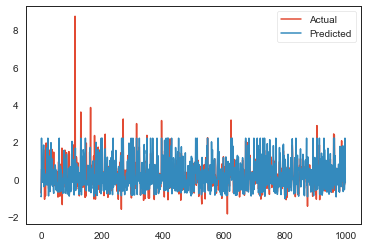

In [30]:
predict = linearRegModel.predict(X_test)
gr = pd.DataFrame({'Predicted':predict,'Actual':y_test})
gr = gr.reset_index()
gr = gr.drop(['index'],axis=1)
plt.plot(gr[:1000])
plt.legend(['Actual','Predicted'])


C:\Users\ADITI\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


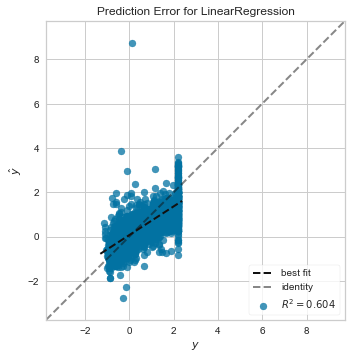

In [31]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(linearRegModel)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 

## Random Forest Regressor

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
random_forest=RandomForestRegressor(n_estimators=35)
random_forest.fit(X_train,y_train)
y_pred = random_forest.predict(X_test)

In [34]:
train_Acc = random_forest.score(X_train, y_train)
test_Acc = random_forest.score(X_test, y_test)

mse = metrics.mean_squared_error(y_test,y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))

print('train Accuracy: ',train_Acc)
print('test Accuracy: ',test_Acc)
print('MSE:', mse)
print('RMSE:', rmse)

train Accuracy:  0.9710715973238051
test Accuracy:  0.7982391895892573
MSE: 0.12573753190538783
RMSE: 0.354594884206453


### Lets work on hyperparameter tuning

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rfc=RandomForestRegressor(random_state=42)
param_grid = { 
    'n_estimators': [5,10,30],
    'max_features': ['auto', 'sqrt'],
    'bootstrap':[True, False],
    'max_depth' : [4,5,6,7,8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10]
}

clf = RandomizedSearchCV(rfc, param_grid, n_iter=50, cv=5, random_state=1)
clf.fit(X_train,y_train)
# randomForest_fitted_model, randomForest_gridCV =algorithm_pipeline(X_train_data=X_train, y_train_data=y_train,model=rfc,param_grid=CV_rfc)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [4, 5, 6, 7, 8],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [5, 10, 30]},
                   random_state=1)

In [36]:
print(clf.best_params_)
y_pred = clf.predict(X_test)

{'n_estimators': 10, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 8, 'bootstrap': True}


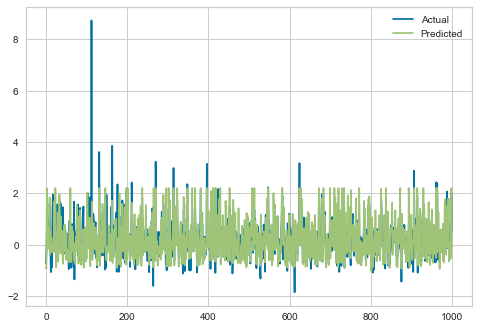

In [37]:
gr = pd.DataFrame({'Predicted':predict,'Actual':y_test})
gr = gr.reset_index()
gr = gr.drop(['index'],axis=1)
plt.plot(gr[:1000])
plt.legend(['Actual','Predicted'])

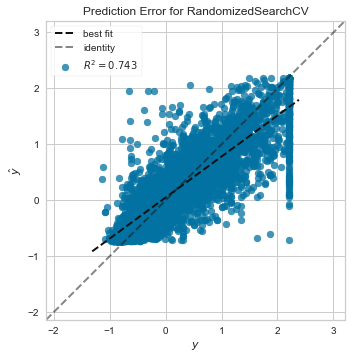

In [38]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(clf)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [39]:
train_Acc = clf.score(X_train, y_train)
test_Acc = clf.score(X_test, y_test)

mse = metrics.mean_squared_error(y_test,y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))

model_results = pd.DataFrame([['Random Forest', train_Acc, test_Acc, mse, rmse]],
               columns = ['Model', 'Train Accuracy(R2)','Test Accuracy(R2)', 'Mean Square Error','Root Mean Square Error' ])
results = results.append(model_results, ignore_index = True)
results

,Model,Train Accuracy(R2),Test Accuracy(R2),Mean Square Error,Root Mean Square Error
0,Linear Regression,0.652910,0.604161,0.246687,0.496676
1,Random Forest,0.808279,0.742843,0.160261,0.400326


### Analysis from above results:

R2 value of Random forest for both train and test data is more than Linear Regression, which means that Random Forest is better fitting the data than Linear Regression.